In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
pd.set_option('future.no_silent_downcasting', True)
from sklearn.inspection import DecisionBoundaryDisplay


In [234]:
opioid_df = pd.read_excel('cost_opioid.xlsx')

In [144]:
opioid_df

,state,case_opioid_disorder,case_fatal,cost_opioid_use,cost_fatal_opioid,combined_cost,per_capita_cost,per_capita_fatal,combined_per_capita
0,Hawaii,5000,53,1106.1,612.1,1718.1,775,429,1204
1,Minnesota,16000,422,3539.5,4873.3,8412.8,635,874,1509
2,California,165000,2199,36501.1,25394.3,61895.5,923,642,1566
3,Wyoming,2000,47,442.4,542.8,985.2,764,937,1701
4,Texas,146000,1458,32298.0,16837.2,49135.1,1141,595,1736
5,Iowa,17000,206,3760.7,2378.9,6139.6,1196,756,1952
6,Georgia,41000,1014,9070.0,11709.8,20779.8,870,1123,1992
7,Mississippi,20000,185,4424.4,2136.4,6560.8,1483,716,2199
8,Colorado,35000,578,7742.7,6674.8,14417.5,1381,1190,2571
9,Oklahoma,26000,388,5751.7,4480.7,10232.4,1463,1140,2603


In [145]:
# Dropping the combined columns, unnecessary
# Creating boolean target value for fatalities over 500
condition = opioid_df['case_fatal'] > 500
opioid_df['fatal_count500'] = condition

In [175]:
opioid_df = opioid_df[['cost_fatal_opioid' , 'per_capita_fatal', 'fatal_count500']]
opioid_df = opioid_df.replace({True: 1, False: 0})
opioid_df['cost_fatal_opioid'] = opioid_df['cost_fatal_opioid'].astype(int)
opioid_df['fatal_count500'] = opioid_df['fatal_count500'].astype(bool)
opioid_df

,cost_fatal_opioid,per_capita_fatal,fatal_count500
0,612,429,False
1,4873,874,False
2,25394,642,True
3,542,937,False
4,16837,595,True
5,2378,756,False
6,11709,1123,True
7,2136,716,False
8,6674,1190,True
9,4480,1140,False


In [237]:
X = opioid_df.drop('fatal_count500', axis=1) 
y = opioid_df['fatal_count500']

KeyError: "['fatal_count500'] not found in axis"

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [239]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [240]:
linear_accuracy = accuracy_score(y_test, y_pred)
linear_precision =  precision_score(y_test, y_pred)
linear_recall = recall_score(y_test, y_pred)
linear_f1 = f1_score(y_test, y_pred)

print(linear_accuracy, linear_precision, linear_recall, linear_f1)

1.0 1.0 1.0 1.0


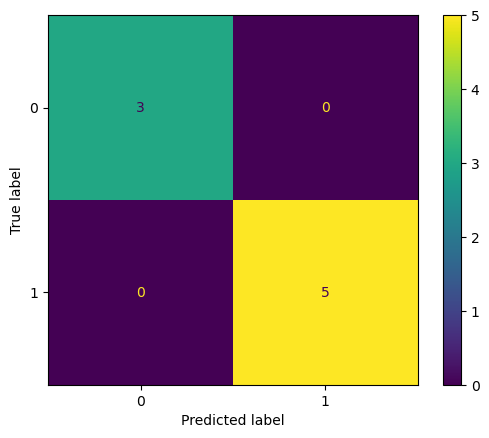

In [241]:
linear_matrix = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=linear_matrix)
matrix.plot()
plt.show()

In [224]:
decision_function = clf.decision_function(X)

# Support Vectors

w = clf.coef_[0]
b = clf.intercept_[0]

x0 = np.linspace(5000, 10000)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

margin = 1/w[1]
high_gutter = decision_boundary + margin
low_gutter = decision_boundary - margin

Text(0.5, 1.0, 'Cost of Fatal Opioid Overdose versus Per Capita Cost')

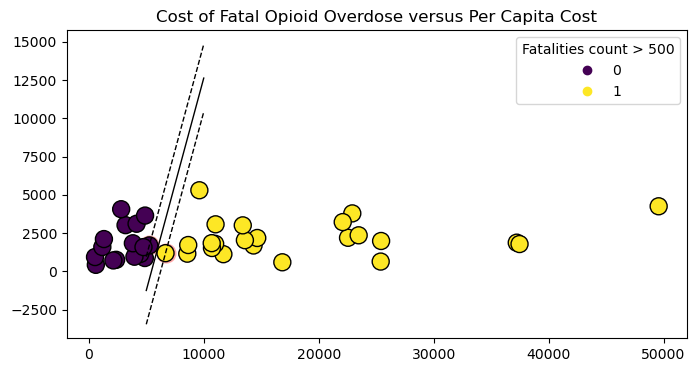

In [226]:
fig, ax = plt.subplots(figsize=(8, 4))
svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=1)
plt.plot(x0, high_gutter, "k--", linewidth=1)
plt.plot(x0, low_gutter, "k--", linewidth=1)
array_plot = opioid_df[['cost_fatal_opioid', 'per_capita_fatal']].to_numpy()
scatter = ax.scatter(array_plot[:, 0], array_plot[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Fatalities count > 500")
ax.set_title("Cost of Fatal Opioid Overdose versus Per Capita Cost")

In [242]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [243]:
poly_accuracy = accuracy_score(y_test, y_pred)
poly_precision =  precision_score(y_test, y_pred)
poly_recall = recall_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred)

In [244]:
print(poly_accuracy, poly_precision, poly_recall, poly_f1)

0.875 1.0 0.8 0.888888888888889


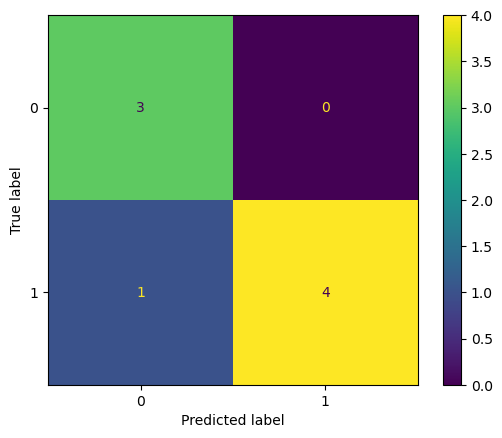

In [245]:
poly_matrix = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=poly_matrix)
matrix.plot()
plt.show()


In [188]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [189]:
rbf_accuracy = accuracy_score(y_test, y_pred)
rbf_precision =  precision_score(y_test, y_pred)
rbf_recall = recall_score(y_test, y_pred)
rbf_f1 = f1_score(y_test, y_pred)

In [232]:
print(rbf_accuracy, rbf_precision, rbf_recall, rbf_f1)

1.0 1.0 1.0 1.0


Text(0.5, 1.0, 'Cost of Fatal Opioid Overdose versus Per Capita Cost')

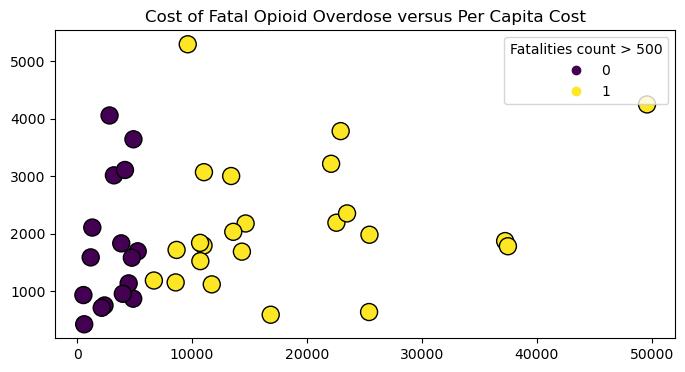

In [231]:
fig, ax = plt.subplots(figsize=(8, 4))
array_plot = opioid_df[['cost_fatal_opioid', 'per_capita_fatal']].to_numpy()
scatter = ax.scatter(array_plot[:, 0], array_plot[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Fatalities count > 500")
ax.set_title("Cost of Fatal Opioid Overdose versus Per Capita Cost")

In [246]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [247]:
linked = linkage(X, 'ward')

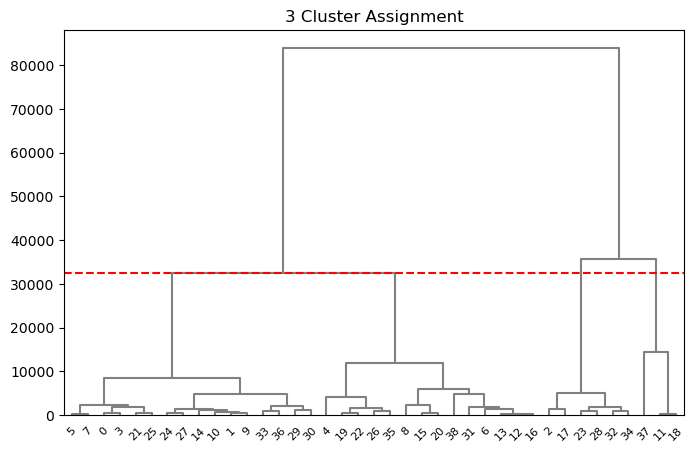

In [284]:
num_clusters = 3
threshold = max([linked[i, 2] for i in range(len(linked) - num_clusters + 1)])
plt.figure(figsize=(8, 5))
dendrogram(linked,
           color_threshold=0,
           above_threshold_color='gray',
           orientation='top')
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title(f"3 Cluster Assignment")
plt.show()

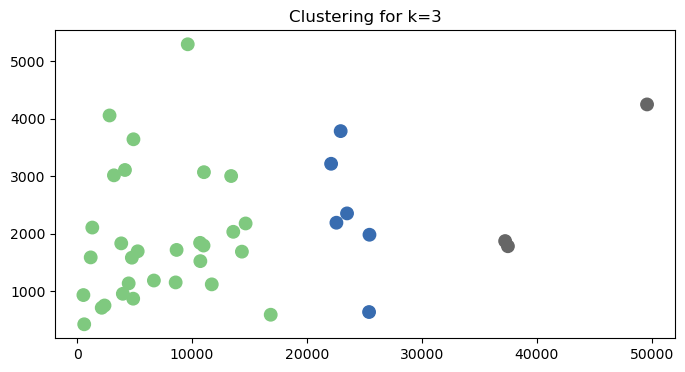

In [285]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, num_clusters, criterion='maxclust')


plt.figure(figsize=(8, 4))
plt.scatter(array_plot[:, 0], array_plot[:, 1], c=clusters, cmap='Accent', s=80)
plt.title("Clustering for " f"k={num_clusters}")
plt.show()

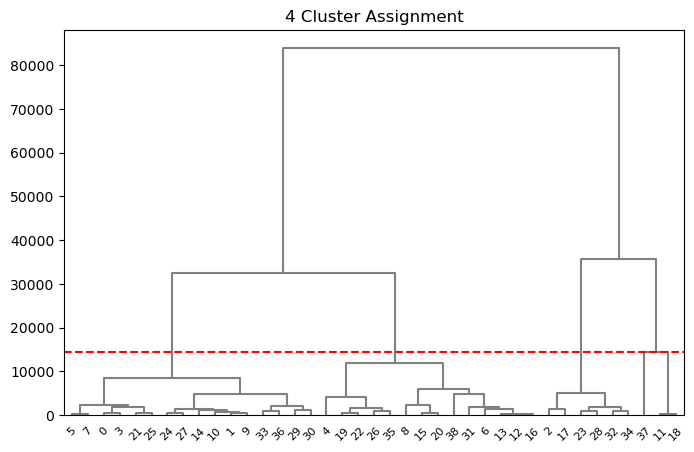

In [283]:
num_clusters = 4
threshold = max([linked[i, 2] for i in range(len(linked) - num_clusters + 1)])
plt.figure(figsize=(8, 5))
dendrogram(linked,
           color_threshold=0,
           above_threshold_color='gray',
           orientation='top')
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title(f"4 Cluster Assignment")
plt.show()

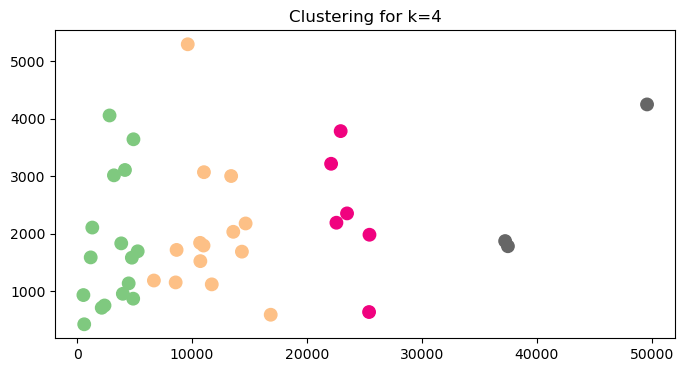

In [282]:
clusters = fcluster(linked, num_clusters, criterion='maxclust')


plt.figure(figsize=(8, 4))
plt.scatter(array_plot[:, 0], array_plot[:, 1], c=clusters, cmap='Accent', s=80)
plt.title("Clustering for " f"k={num_clusters}")
plt.show()

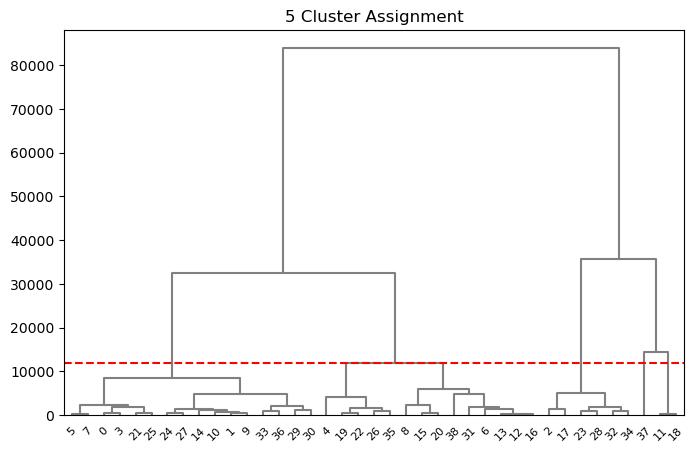

In [286]:
num_clusters = 5
threshold = max([linked[i, 2] for i in range(len(linked) - num_clusters + 1)])
plt.figure(figsize=(8, 5))
dendrogram(linked,
           color_threshold=0,
           above_threshold_color='gray',
           orientation='top')
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title(f"5 Cluster Assignment")
plt.show()

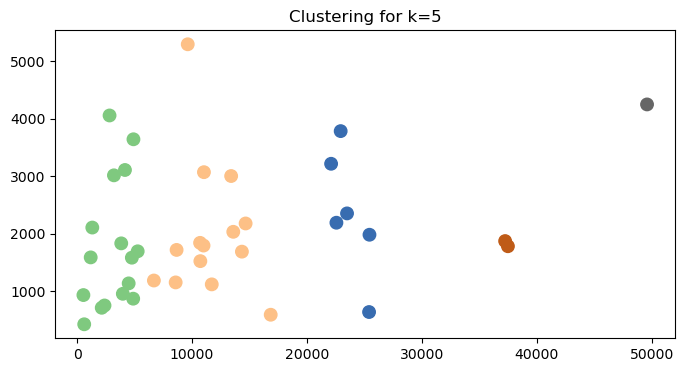

In [278]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, num_clusters, criterion='maxclust')


plt.figure(figsize=(8, 4))
plt.scatter(array_plot[:, 0], array_plot[:, 1], c=clusters, cmap='Accent', s=80)
plt.title("Clustering for " f"k={num_clusters}")
plt.show()